In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c g-research-crypto-forecasting

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip train.csv.zip

unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [ ]:
df.shape

(24236806, 10)

In [ ]:
from datetime import datetime
df['date'] = pd.to_datetime(df['timestamp'], unit = 's')
df = df.sort_values('date')
groups = pd.factorize(df['date'].dt.day.astype(str) + '_' + df['date'].dt.month.astype(str) + '_' + df['date'].dt.year.astype(str))[0]

In [ ]:
btc = df[df["Asset_ID"]==1].set_index("date")

In [ ]:
btc

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
date,,,,,,,,,,
2018-01-01 00:01:00,1514764860,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
2018-01-01 00:02:00,1514764920,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
2018-01-01 00:03:00,1514764980,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
2018-01-01 00:04:00,1514765040,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
2018-01-01 00:05:00,1514765100,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
2021-09-20 23:57:00,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
2021-09-20 23:58:00,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


In [ ]:
btc.isna().sum()

timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP           0
Target       304
dtype: int64

In [ ]:
btc.describe

<bound method NDFrame.describe of                       timestamp  Asset_ID  ...          VWAP    Target
date                                       ...                        
2018-01-01 00:01:00  1514764860         1  ...  13827.062093 -0.014643
2018-01-01 00:02:00  1514764920         1  ...  13840.362591 -0.015037
2018-01-01 00:03:00  1514764980         1  ...  13806.068014 -0.010309
2018-01-01 00:04:00  1514765040         1  ...  13783.598101 -0.008999
2018-01-01 00:05:00  1514765100         1  ...  13735.586842 -0.008079
...                         ...       ...  ...           ...       ...
2021-09-20 23:56:00  1632182160         1  ...  42935.489499       NaN
2021-09-20 23:57:00  1632182220         1  ...  42879.576084       NaN
2021-09-20 23:58:00  1632182280         1  ...  42844.090693       NaN
2021-09-20 23:59:00  1632182340         1  ...  42935.761938       NaN
2021-09-21 00:00:00  1632182400         1  ...  43011.414052       NaN

[1956282 rows x 10 columns]>

In [ ]:
import plotly.graph_objects as go

In [ ]:
from datetime import datetime
from plotly.offline import iplot

In [ ]:
btc_mini = btc.iloc[-200:]

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])

In [ ]:
fig.show()

In [ ]:
btc

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
date,,,,,,,,,,
2018-01-01 00:01:00,1514764860,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
2018-01-01 00:02:00,1514764920,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
2018-01-01 00:03:00,1514764980,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
2018-01-01 00:04:00,1514765040,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
2018-01-01 00:05:00,1514765100,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
2021-09-20 23:57:00,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
2021-09-20 23:58:00,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


In [ ]:
btc.dropna(axis=0,inplace=True)

In [ ]:
btc['Target']

date
2018-01-01 00:01:00   -0.014643
2018-01-01 00:02:00   -0.015037
2018-01-01 00:03:00   -0.010309
2018-01-01 00:04:00   -0.008999
2018-01-01 00:05:00   -0.008079
                         ...   
2021-09-20 23:40:00    0.002084
2021-09-20 23:41:00    0.003246
2021-09-20 23:42:00    0.003108
2021-09-20 23:43:00    0.002770
2021-09-20 23:44:00    0.002726
Name: Target, Length: 1955978, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(btc)

array([[0.00000000e+00, 0.00000000e+00, 2.60639940e-03, ...,
        3.03219374e-03, 1.73157660e-01, 3.50255692e-01],
       [5.11001087e-07, 0.00000000e+00, 2.67498885e-03, ...,
        2.98379108e-03, 1.73373411e-01, 3.47876949e-01],
       [1.02200217e-06, 0.00000000e+00, 6.02444071e-03, ...,
        5.29185442e-03, 1.72817110e-01, 3.76470875e-01],
       ...,
       [9.99998978e-01, 0.00000000e+00, 3.01907930e-02, ...,
        1.12858314e-02, 6.42309135e-01, 4.57616100e-01],
       [9.99999489e-01, 0.00000000e+00, 2.43835522e-02, ...,
        7.50114308e-03, 6.42308302e-01, 4.55572353e-01],
       [1.00000000e+00, 0.00000000e+00, 2.47379311e-02, ...,
        8.31511137e-03, 6.41192919e-01, 4.55303149e-01]])

In [ ]:
btc.drop(columns=['timestamp','Asset_ID'],axis=1,inplace=True)

In [ ]:
y = btc['Target']
X = btc.drop(columns=['Target'],axis=1)
btc=btc.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=0)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 7, 50)             10400     
                                                                 
 lstm_22 (LSTM)              (None, 7, 50)             20200     
                                                                 
 lstm_23 (LSTM)              (None, 7, 50)             20200     
                                                                 
 lstm_24 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,verbose=1,epochs=10,batch_size=1024)

Epoch 1/10
1529/1529 [==============================] - 282s 180ms/step - loss: 1.7651e-05
Epoch 2/10
1529/1529 [==============================] - 250s 163ms/step - loss: 4.1216e-06
Epoch 3/10
1529/1529 [==============================] - 245s 161ms/step - loss: 4.2335e-06
Epoch 4/10
1529/1529 [==============================] - 245s 160ms/step - loss: 4.2431e-06
Epoch 5/10
1529/1529 [==============================] - 245s 160ms/step - loss: 4.1696e-06
Epoch 6/10
1529/1529 [==============================] - 246s 161ms/step - loss: 4.1552e-06
Epoch 7/10
1529/1529 [==============================] - 244s 160ms/step - loss: 4.1270e-06
Epoch 8/10
1529/1529 [==============================] - 246s 161ms/step - loss: 4.1527e-06
Epoch 9/10
1529/1529 [==============================] - 245s 160ms/step - loss: 4.1126e-06
Epoch 10/10
1529/1529 [==============================] - 244s 159ms/step - loss: 4.1048e-06


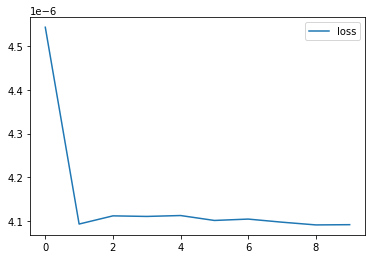

In [ ]:
 losses=pd.DataFrame(model.history.history)
losses.plot()